In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 构建样本数据
# 构建一个100行，2列的空矩阵
X = np.empty((100, 2))
# 第一个特征为0到100的随机分布
X[:, 0] = np.random.uniform(0., 100., size=100)
# 第二个特征和第一个特征有一定线性关系，并且增加了0到10的正态分布的噪音
X[:, 1] = X[:, 0] * 0.75 + 3. + np.random.normal(0, 10., size=100)

In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
X_reduction = pca.transform(X)

In [6]:
X_reduction.shape

(100, 1)

In [8]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

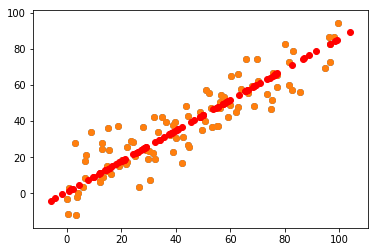

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [13]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [14]:
X.shape

(1797, 64)

In [18]:
# 将样本数据拆分为训练数据集和测试数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
X_train.shape

(1347, 64)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 4.61 ms, sys: 3.25 ms, total: 7.86 ms
Wall time: 38.1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_clf.score(X_test, y_test)

0.98666666666666669

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
%time pca.fit(X_train)

CPU times: user 32.7 ms, sys: 6.13 ms, total: 38.8 ms
Wall time: 10.1 ms


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [32]:
X_train_reduction.shape

(1347, 2)

In [34]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.75 ms, sys: 1.02 ms, total: 2.77 ms
Wall time: 1.77 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
knn_clf.score(X_test_reduction, y_test)

0.60666666666666669

In [36]:
pca.explained_variance_ratio_

array([ 0.14566817,  0.13735469])

In [37]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([  1.45668166e-01,   1.37354688e-01,   1.17777287e-01,
         8.49968861e-02,   5.86018996e-02,   5.11542945e-02,
         4.26605279e-02,   3.60119663e-02,   3.41105814e-02,
         3.05407804e-02,   2.42337671e-02,   2.28700570e-02,
         1.80304649e-02,   1.79346003e-02,   1.45798298e-02,
         1.42044841e-02,   1.29961033e-02,   1.26617002e-02,
         1.01728635e-02,   9.09314698e-03,   8.85220461e-03,
         7.73828332e-03,   7.60516219e-03,   7.11864860e-03,
         6.85977267e-03,   5.76411920e-03,   5.71688020e-03,
         5.08255707e-03,   4.89020776e-03,   4.34888085e-03,
         3.72917505e-03,   3.57755036e-03,   3.26989470e-03,
         3.14917937e-03,   3.09269839e-03,   2.87619649e-03,
         2.50362666e-03,   2.25417403e-03,   2.20030857e-03,
         1.98028746e-03,   1.88195578e-03,   1.52769283e-03,
         1.42823692e-03,   1.38003340e-03,   1.17572392e-03,
         1.07377463e-03,   9.55152460e-04,   9.00017642e-04,
         5.79162563e-04,

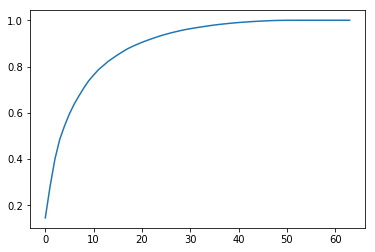

In [38]:
plt.plot([i for i in range(X_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [39]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.n_components_

28

In [41]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [42]:
X_train_reduction.shape

(1347, 28)

In [43]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 2.25 ms, sys: 1.54 ms, total: 3.79 ms
Wall time: 2.44 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
knn_clf.score(X_test_reduction, y_test)

0.97999999999999998